### [택배 배달과 수거하기](https://school.programmers.co.kr/learn/courses/30/lessons/150369)

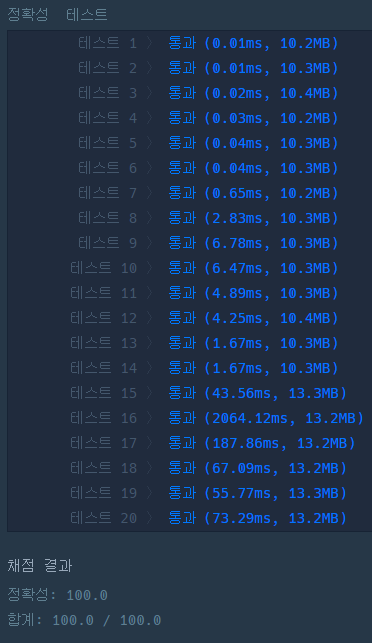

In [9]:
from collections import deque

def solution(cap, n, deliveries, pickups):
    
    deliveries = deque(reversed(deliveries))
    pickups = deque(reversed(pickups))
    answer = 0
    
    while deliveries or pickups:
        # 맨 마지막 집부터 배달/수거를 고려
        while deliveries and deliveries[0] == 0:
            deliveries.popleft()
        while pickups and pickups[0] == 0:
            pickups.popleft()
        
        if not deliveries and not pickups:
            break
        
        # 가장 먼 거리 계산
        distance = max(len(deliveries), len(pickups))
        answer += distance * 2
        
        # 배달 및 수거 처리
        cap_deliver = cap
        cap_pickup = cap
        
        while deliveries and cap_deliver > 0:
            if deliveries[0] <= cap_deliver:
                cap_deliver -= deliveries.popleft()
            else:
                deliveries[0] -= cap_deliver
                cap_deliver = 0
        
        while pickups and cap_pickup > 0:
            if pickups[0] <= cap_pickup:
                cap_pickup -= pickups.popleft()
            else:
                pickups[0] -= cap_pickup
                cap_pickup = 0
        
    return answer

- 다른 사람의 코드  
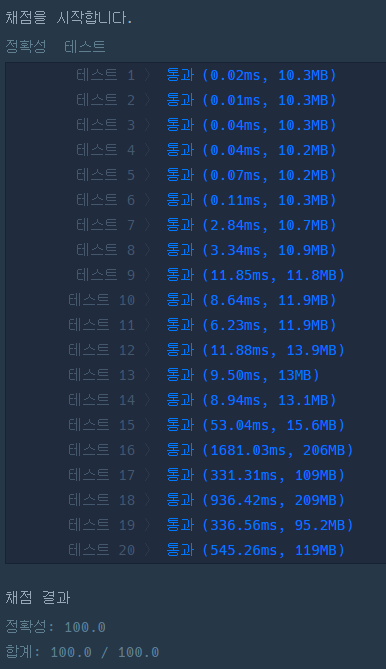

In [ ]:
from itertools import zip_longest as zip

def tolist(l):
    n=[]
    for i,d in enumerate(l):
        for _ in range(d):
            n.append(i+1)
    return n

def solution(cap, n, deliveries, pickups):
    d=tolist(deliveries)
    p=tolist(pickups)
    d.reverse()
    p.reverse()
    d=d[::cap]
    p=p[::cap]
    return 2*sum([max(x,y) for x,y in zip(d,p,fillvalue=0)])

In [10]:
cap, n, deliveries, pickups = 4, 5,	[1, 0, 3, 1, 2], [0, 3, 0, 4, 0]
solution(cap, n, deliveries, pickups)

16

### [교점에 별 만들기](https://school.programmers.co.kr/learn/courses/30/lessons/87377)

In [98]:
from itertools import combinations

def solution(line):    
    def intersect(l1, l2):
        A1, B1, C1 = l1
        A2, B2, C2 = l2
        det = A1 * B2 - A2 * B1
        if det == 0:
            return None  # Lines are parallel
        x = (B1 * C2 - B2 * C1) / det
        y = (A2 * C1 - A1 * C2) / det
        if x.is_integer() and y.is_integer():
            return (int(x), int(y))
        return None
    
    points = set()
    for (l1, l2) in combinations(line, 2):
        point = intersect(l1, l2)
        if point:
            points.add(point)
    
    if not points:
        return []

    xs, ys = zip(*points)
    min_x, max_x = min(xs), max(xs)
    min_y, max_y = min(ys), max(ys)
    
    width = max_x - min_x + 1
    height = max_y - min_y + 1
    
    grid = [['.'] * width for _ in range(height)]
    
    for (x, y) in points:
        grid[max_y - y][x - min_x] = '*'
    
    return [''.join(row) for row in grid]


In [99]:
line = [[2, -1, 4], [-2, -1, 4], [0, -1, 1], [5, -8, -12], [5, 8, 12]]
solution(line)

['....*....',
 '.........',
 '.........',
 '*.......*',
 '.........',
 '.........',
 '.........',
 '.........',
 '*.......*']

In [100]:
line = [[0, 1, -1], [1, 0, -1], [1, 0, 1]]
solution(line)

['*.*']